# Análisis  papersDate
### Integrantes: Daniel Álvarez, Jorge Flores, Daniel Tinizaray

In [1]:
import pandas as pd
import numpy as np
import Levenshtein as lv
import nltk
from pandas.core.common import flatten
import itertools

In [2]:
data = pd.read_csv('papersDate.csv', encoding='UTF-8')
data

,title,publisher,YEAR,author keywords,scopusDistributionDate
0,COVID-19 Deep Learning Prediction Model Using ...,Hindawi Limited,2020,NaN,2020-12-13
1,COVID-19 detection in CT images with deep lear...,Elsevier Ltd,2020,Chest radiography; COVID-19; Deep learning; Ef...,2021-02-04
2,Decoding COVID-19 pneumonia: comparison of dee...,Springer Science and Business Media Deutschlan...,2020,AI interpretability; Coronavirus disease 2019 ...,2021-01-28
3,Deep learning for automatic quantification of ...,Elsevier Ltd,2020,Computed tomography; COVID-19; Deep learning; ...,2020-12-11
4,COVID-19 Detection through Transfer Learning U...,Institute of Electrical and Electronics Engi...,2020,CNN models; COVID-19 detection; image processi...,2021-02-19
...,...,...,...,...,...
855,Machine learning applied on chest x-ray can ai...,Springer Science and Business Media Deutschlan...,2021,Artificial intelligence; COVID-19; Neural netw...,NaN
856,Deep COVID DeteCT: an international experience...,Nature Research,2021,NaN,NaN
857,Fast automated detection of COVID-19 from medi...,Nature Research L,2021,NaN,NaN
858,Risk factors analysis of COVID-19 patients wit...,Nature Research,2021,NaN,NaN


<AxesSubplot:>

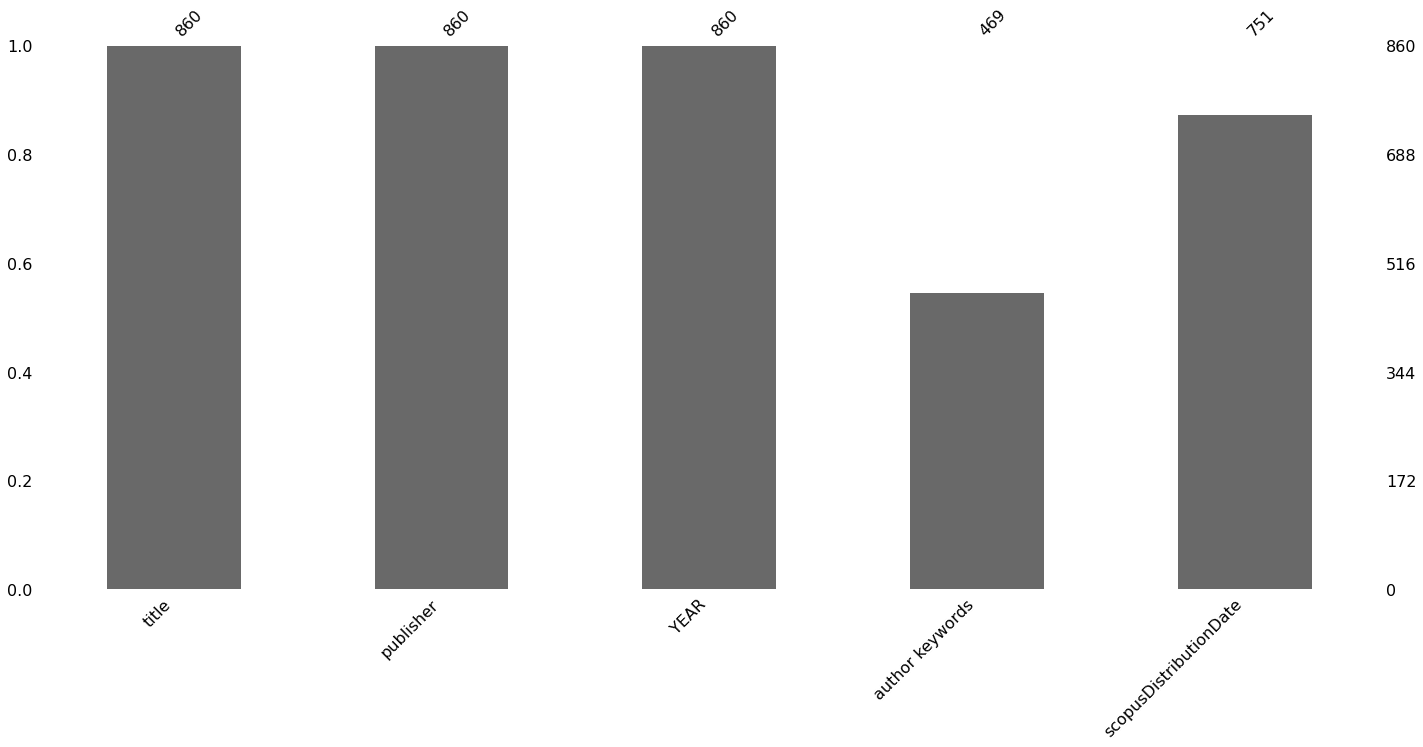

In [3]:
import missingno

missingno.bar(data)

<AxesSubplot:>

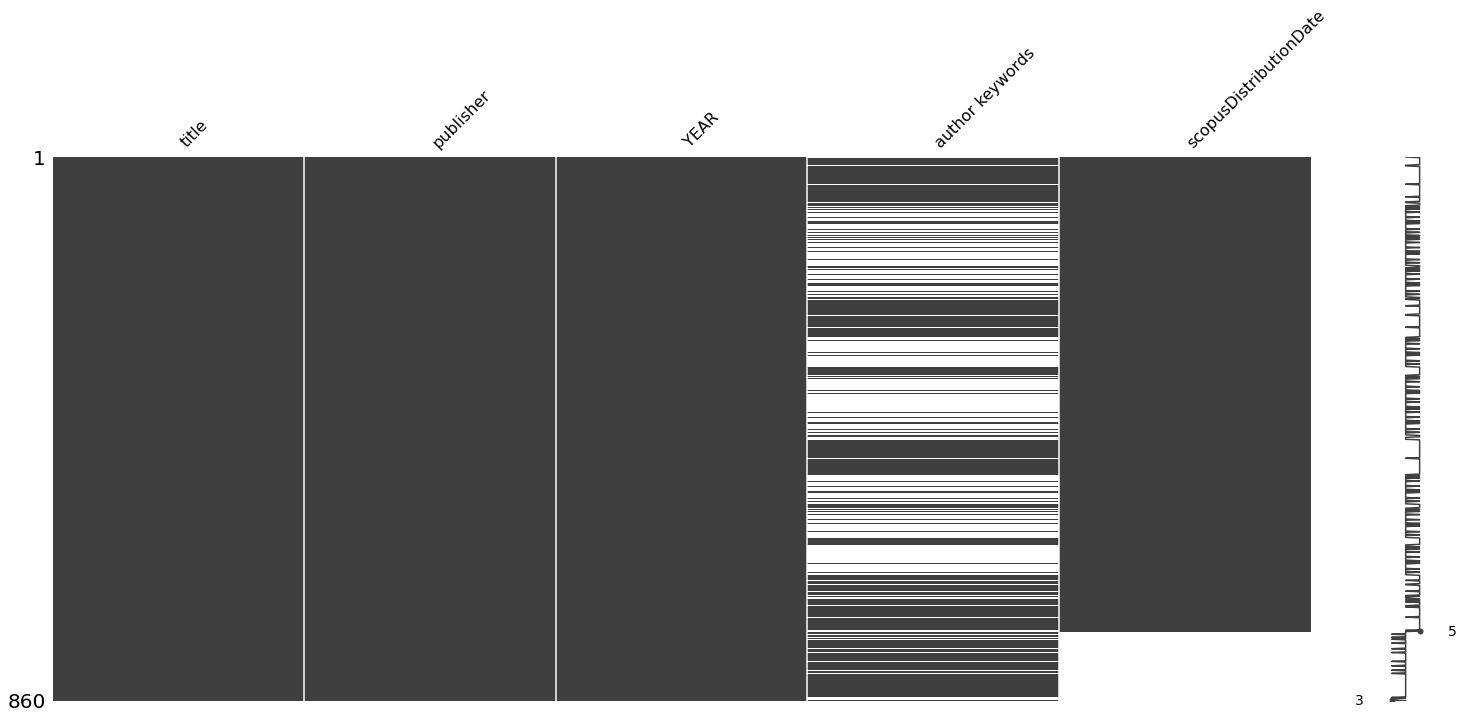

In [4]:
missingno.matrix(data)

<AxesSubplot:>

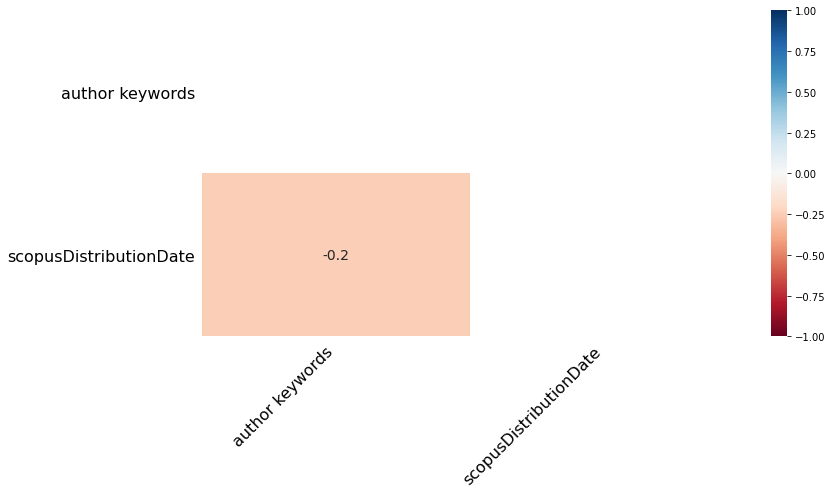

In [5]:
missingno.heatmap(data, figsize = (12, 6))

In [6]:
print('Número de duplicados presentes')

print(data.duplicated().sum())

print('Número de valores nulos')

print(data.isnull().sum())

print(data.groupby('publisher').count())

# Limpieza general del df

data = data.drop_duplicates()
data.duplicated().sum() # No existen los duplicados

### Elsevier* -> Elsevier

data.publisher = data.publisher.apply(lambda x: 'Elsevier' if 'Elsevier' in x else x)

Número de duplicados presentes
16
Número de valores nulos
title                       0
publisher                   0
YEAR                        0
author keywords           391
scopusDistributionDate    109
dtype: int64
                                                    title  YEAR  \
publisher                                                         
  Institute of Electrical and Electronics Engin...      1     1   
AIMS Press                                              1     1   
ASTES Publishers                                        1     1   
Academic Press Inc.                                     2     2   
Adis                                                    1     1   
...                                                   ...   ...   
Wiley-VCH Verlag                                        1     1   
Wolters Kluwer Medknow Publications                     2     2   
World Academy of Research in Science and Engine...      5     5   
World Scientific                          

c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Unificar valores similares en la columna 'publisher'
### CEUR-WS* -> CEUR-WS

In [7]:
data = data.replace({'CEUR-WS -': 'CEUR-WS', 'CEUR-WS-': 'CEUR-WS'})


### Association for Computing Machinery, Inc -> Association for Computing Machinery

In [8]:
data = data.replace({'Association for Computing Machinery, Inc': 'Association for Computing Machinery'})

In [9]:
print(list(data['YEAR'].unique()))

[2020, -2020, 20, 2021, 21]


In [10]:
# cartera por vencer
l1=[]
for i in data['YEAR']:
    x = str(i)
    x = x.replace("-", "")
    l1.append(int(x))

data['YEAR'] = l1


In [11]:
l1=[]
for i in data['YEAR']:
    if (i == 21):
        i = 2021
        l1.append(i)
    elif(i == 20):
        i = 2020
        l1.append(i)
    else:
        l1.append(i)
        
data['YEAR'] = l1
        



In [12]:
g = data.groupby(['YEAR'])[['YEAR']].count()
g

,YEAR
YEAR,
2020,697
2021,147


In [13]:
data['author keywords'] = data['author keywords'].fillna('null')

In [14]:
data

,title,publisher,YEAR,author keywords,scopusDistributionDate
0,COVID-19 Deep Learning Prediction Model Using ...,Hindawi Limited,2020,null,2020-12-13
1,COVID-19 detection in CT images with deep lear...,Elsevier,2020,Chest radiography; COVID-19; Deep learning; Ef...,2021-02-04
2,Decoding COVID-19 pneumonia: comparison of dee...,Springer Science and Business Media Deutschlan...,2020,AI interpretability; Coronavirus disease 2019 ...,2021-01-28
3,Deep learning for automatic quantification of ...,Elsevier,2020,Computed tomography; COVID-19; Deep learning; ...,2020-12-11
4,COVID-19 Detection through Transfer Learning U...,Institute of Electrical and Electronics Engi...,2020,CNN models; COVID-19 detection; image processi...,2021-02-19
...,...,...,...,...,...
855,Machine learning applied on chest x-ray can ai...,Springer Science and Business Media Deutschlan...,2021,Artificial intelligence; COVID-19; Neural netw...,NaN
856,Deep COVID DeteCT: an international experience...,Nature Research,2021,null,NaN
857,Fast automated detection of COVID-19 from medi...,Nature Research L,2021,null,NaN
858,Risk factors analysis of COVID-19 patients wit...,Nature Research,2021,null,NaN


In [15]:
list_kw=data['author keywords']
list_kw =list(map (lambda x: str (x).lower().split(';'), list_kw))
list_kw 

[['null'],
 ['chest radiography',
  ' covid-19',
  ' deep learning',
  ' efficientnet',
  ' pneumonia'],
 ['ai interpretability',
  ' coronavirus disease 2019 pneumonia',
  ' ct chest',
  ' explainable ai',
  ' machine learning'],
 ['computed tomography', ' covid-19', ' deep learning', ' lung infection'],
 ['cnn models',
  ' covid-19 detection',
  ' image processing',
  ' model comparison',
  ' ultrasound and ct based detection',
  ' x-ray'],
 ['coronavirus',
  ' covid-19',
  ' deep-learning',
  ' pandemic',
  ' transfer-learning'],
 ['artificial intelligence',
  ' covid-19',
  ' ct images',
  ' deep learning',
  ' seir model'],
 ['artificial intelligence (ai), deep learning',
  ' covid-19',
  ' diagnosis',
  ' respiratory diseases',
  ' severe acute respiratory syndrome coronavirus 2 (sars-cov-2)'],
 ['computed topography',
  ' conditional generative adversarial network',
  ' covid-19',
  ' image synthesis'],
 ['artificial intelligence',
  ' covid-19',
  ' deep learning',
  ' tomograp

In [16]:
flat_list = list(flatten(list_kw))
flat_list = list(map (lambda x: x.strip() , flat_list))
freq = nltk.FreqDist(flat_list)
aux =[]
for key,val in freq.items():
    aux.append([key,val])
#     print (str(key) + ':' + str(val))
# aux.to
kw = list(map(lambda x: x[0],aux))
fr = list(map(lambda x: x[1],aux))
out_dict = {'Key Word': kw, 'Frequency':fr}
odb = pd.DataFrame(out_dict)

In [17]:
odb.sort_values(by='Frequency',ascending=False).head(15)

,Key Word,Frequency
0,null,375
2,covid-19,297
3,deep learning,262
23,artificial intelligence,64
10,machine learning,62
19,coronavirus,50
62,convolutional neural networks,34
5,pneumonia,32
38,transfer learning,30
74,convolutional neural network,29


In [18]:
lv.jaro('hola', 'ssss')

0.0

In [22]:
a = sorted(list(data['publisher'].unique()))
for b in a:
    print(b)
print(len(a))

  Institute of Electrical and Electronics Engineers Inc.
AIMS Press
ASTES Publishers
Academic Press Inc.
Adis
American Chemical Society
Association for Computing Machinery
BioMed Central Ltd
CESER Publications
CEUR-WS
CEUR-WS   
Centro Universitário Curitiba - UNICURITIBA
Churchill Livingstone
Dove Medical Press Ltd
EUROSIS
Editorial and Publishing Board of JIG
El Profesional de la Informacion
Elsevier
Emerald Group Holdings Ltd.
European Alliance for Innovation
European Respiratory Society
Frontiers Media S.A.
Hindawi Limited
IEEE Computer Society
IMR Press Limited
IOP Publishing Ltd
IOP Publishing Ltd.
IOS Press BV
Institute of Advanced Engineering and Science
Institute of Electrical and Electronics Engineers
Institute of Electrical and Electronics Engineers Inc.
Institute of Physics Publishing
Institution of Chemical Engineers
International Information and Engineering Technology Association
International Journal of Mathematical, Engineering and Management Sciences
Iran University of

In [21]:
datapublisher = pd.DataFrame(a)
datapublisher = datapublisher.drop_duplicates()
datapublisher

,0
0,Institute of Electrical and Electronics Engi...
1,AIMS Press
2,ASTES Publishers
3,Academic Press Inc.
4,Adis
...,...
75,Wiley-VCH Verlag
76,Wolters Kluwer Medknow Publications
77,World Academy of Research in Science and Engin...
78,World Scientific


In [ ]:

a = []
for i in data['publisher']:
    for j in data['publisher']:
        a.append([i, j, lv.jaro(i, j)])

In [ ]:
b = pd.DataFrame(a)
b